## 7.5　CNN の実装

In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

In [2]:
os.chdir('/Users/yuta.shimizu/Downloads/Machine Learning/deep-learning-from-scratch-master/ch07')
sys.path.append(os.pardir)

### 7.5.1　CNN の実装

In [3]:
class SimpleConvNet:
    def __init__(
        self, input_dim=(1, 28, 28),
        conv_param={'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
        hidden_size=100,
        out_size=10,
        weight_init_std=0.01
    ):
        
        filter_num = conv_param['filter_num']
        filter_size = conv_param['filter_size']
        filter_pad = conv_param['pad']
        filter_stride = conv_param['stride']
        input_size = input_dim[1]
        conv_output_size = (input_size - filter_size + 2*filter_pad) / filter_stride + 1
        pool_output_size = int(filter_num * (conv_output_size/2) * (conv_output_size/2))
        
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(filter_num, input_dim[0], filter_size, filter_size)
        self.params['b1'] = np.zeros(filter_num)
        self.params['W2'] = weight_init_std * np.random.randn(pool_output_size, hidden_size)
        self.params['b2'] = np.zeros(hidden_size)
        self.params['W3'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b3'] = np.zeros(output_size)
        
        self.layers = OrderDict()
        self.layers['Conv1'] = Convolution(self.params['W1'],self.params['b1'], conv_param['stride'], conv_param['pad'])
        self.layers['Relu1'] = Relu()
        self.layers['Pool1'] = Pooling(pool_h=2, pool_w=2, stride=2)
        self.layers['Affine1'] = Affine(self.params['W2'], self.params['b2'])
        self.layers['Relu2'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W3'], self.params['b3'])
        self.last_layer = SoftmaxWithLoss()
        
        def predict(self, x):
            for layer in self.layers.values():
                x = layer.forward(x)
            return x
        
        def loss(self, x, t):
            y = self.predict(x)
            return self.last_layer.forward(y, t)
        
        def gradient(self, x, t):
            self.loss(x, t)
            
            dout = 1
            dout = self.last_layer.backward(dout)
            
            layers = list(self.layers.values())
            layers.reverse()
            for layer in layers:
                dout = layer.backward(dout)
                
            grads = {}
            grads['W1'] = self.layers['Conv1'].dW
            grads['b1'] = self.layers['Conv1'].db
            grads['W2'] = self.layers['Affine1'].dW
            grads['b2'] = self.layers['Affine1'].db
            grads['W3'] = self.layers['Affine2'].dW
            grads['b3'] = self.layers['Affine2'].db
            
            return grads

### 7.5.2　CNN の学習

In [4]:
from dataset.mnist import load_mnist
from simple_convnet import SimpleConvNet
from common.trainer import Trainer

train loss:2.300116532724218
=== epoch:1, train acc:0.265, test acc:0.292 ===
train loss:2.2961534723318127
train loss:2.2918028236231707
train loss:2.2868385443092376
train loss:2.279114340541758
train loss:2.26510043005152
train loss:2.2526888742293143
train loss:2.222675888745611
train loss:2.19425671094475
train loss:2.1593311867152694
train loss:2.1777261215237314
train loss:2.0898340805117375
train loss:2.0395785601229464
train loss:2.0082072858935045
train loss:1.9522222136305034
train loss:1.9224940795012069
train loss:1.8437196529951194
train loss:1.7369911276430559
train loss:1.751421095444706
train loss:1.59795629232782
train loss:1.4823839645326442
train loss:1.443677177603905
train loss:1.2859825136504002
train loss:1.1858811902186785
train loss:1.1524210076710935
train loss:1.0989740032428081
train loss:1.061360715550626
train loss:0.9785787008084965
train loss:0.8456749912645023
train loss:0.9046798396932982
train loss:0.7566071674444597
train loss:0.8370260687824798
tra

train loss:0.2155572011924116
train loss:0.19383529383248205
train loss:0.17018696316343201
train loss:0.2571638102033181
train loss:0.22362194072610464
train loss:0.12274134522854116
train loss:0.21253434316035133
train loss:0.22735039456187256
train loss:0.17741156397008084
train loss:0.21699514072602485
train loss:0.11703835165802177
train loss:0.18672505428184766
train loss:0.19800754800110087
train loss:0.13947613595279618
train loss:0.09836874438149247
train loss:0.12721570301713567
train loss:0.1523536095809933
train loss:0.2498194600162801
train loss:0.17023736590580316
train loss:0.16529290572075245
train loss:0.1962534424375578
train loss:0.22118585912160327
train loss:0.09183183870480949
train loss:0.10872715021979927
train loss:0.11748027889223873
train loss:0.18406519928812698
train loss:0.16389069792132058
train loss:0.13429582195018688
train loss:0.07285770062896021
train loss:0.14540159276648265
train loss:0.1974992265127386
train loss:0.06165054159233267
train loss:0.1

train loss:0.20454511097732075
train loss:0.09014945332856529
train loss:0.046556568002241956
train loss:0.19194186095351362
train loss:0.0689998952585824
train loss:0.13049816710720397
train loss:0.08411101148943861
train loss:0.08204278905318402
train loss:0.0474287907692694
train loss:0.12193704132030221
train loss:0.06544783620904676
train loss:0.06736500564819711
train loss:0.04839293614398733
train loss:0.060506901632563885
train loss:0.1187748774955727
train loss:0.050273222507635634
train loss:0.07146059301163739
train loss:0.07649717030941212
train loss:0.09533358500537906
train loss:0.15855621519912383
train loss:0.12002871587750424
train loss:0.040851177802838076
train loss:0.08174695711316207
train loss:0.1144363431836281
train loss:0.056089595769562545
train loss:0.12622325647223281
train loss:0.0590185913159711
train loss:0.06697429221987042
train loss:0.033739782608903465
train loss:0.07659033902963758
train loss:0.0988033891273163
=== epoch:12, train acc:0.966, test acc

train loss:0.022613708673804987
train loss:0.0944189489292665
train loss:0.022814673910742166
train loss:0.030138370540268387
train loss:0.03979114686436291
train loss:0.03348312551537811
train loss:0.038785254049523876
train loss:0.055303321618583604
train loss:0.04200204418739508
train loss:0.02003010516871687
train loss:0.01841891676738719
train loss:0.02091864725163963
train loss:0.043760639600481224
train loss:0.03901316768796463
train loss:0.036151953359472154
train loss:0.03169526417517278
train loss:0.04238218395062942
train loss:0.02003122950544273
train loss:0.02628229426645425
train loss:0.02053940313019337
train loss:0.04176609600632214
train loss:0.04853896088061696
train loss:0.035316809727658736
train loss:0.02436579340196324
train loss:0.06765951357145847
=== epoch:17, train acc:0.986, test acc:0.961 ===
train loss:0.012984152035661587
train loss:0.0651235067642105
train loss:0.07542371431974061
train loss:0.01931198783663897
train loss:0.060400405375151796
train loss:0

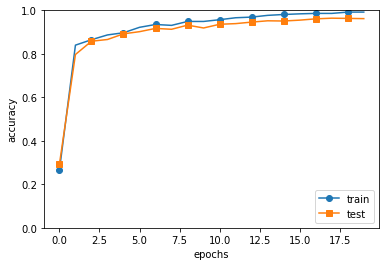

In [5]:
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)

x_train, t_train = x_train[:5000], t_train[:5000]
x_test, t_test = x_test[:1000], t_test[:1000]

max_epochs = 20

network = SimpleConvNet(
    input_dim=(1, 28, 28),
    conv_param = {'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
    hidden_size=100,
    output_size=10,
    weight_init_std=0.01
)

trainer = Trainer(
    network, x_train, t_train, x_test, t_test, epochs=max_epochs, mini_batch_size=100, optimizer='Adam',
    optimizer_param={'lr': 0.001}, evaluate_sample_num_per_epoch=1000
)

trainer.train()

network.save_params('params.pkl')
print('Save Network Parameters!')

markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, trainer.train_acc_list, marker='o', label='train', markevery=2)
plt.plot(x, trainer.test_acc_list, marker='s', label='test', markevery=2)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()